In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('~/alerts_results/SGP/SGP_2019-01-01_2019-12-31_glad_stats.txt')
df

,patchId,nb_pixel,value
0,25813,1,3
1,101318,1,3
2,139742,1,3
3,148262,2,3
4,154972,1,3
...,...,...,...
208,1124475,1,3
209,1124507,1,3
210,1140959,1,3
211,1219433,1,3


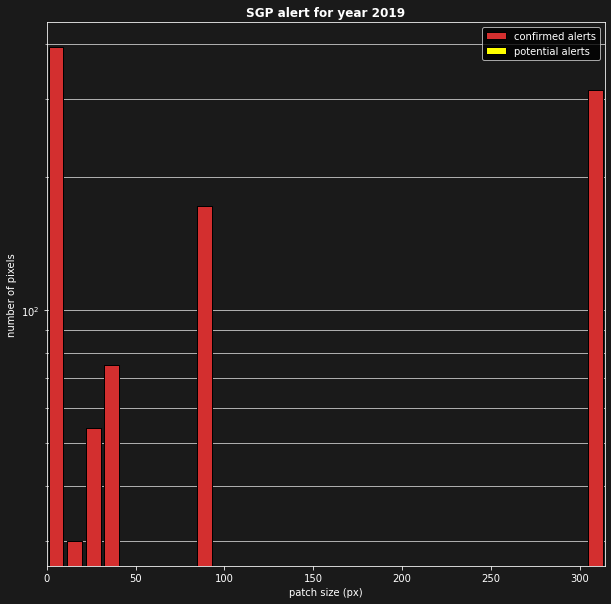

In [27]:
values = {'confirmed alerts': 3, 'potential alerts': 2}
    
y_ = []
max_ = 0
for index, name in enumerate(values): 
        
    #load the patches
    y_local = df[df['value'] == values[name]]['nb_pixel'].to_numpy()
    y_local = np.append(y_local, 0) #add the 0 to prevent bugs when there are no data (2017 for ex)
    max_ = max(max_, np.amax(y_local))
        
    #add them to the global y_
    y_.append(y_local)
        
fig, ax = plt.subplots(figsize=(10,10))
    
ax.set_axisbelow(True)
ax.yaxis.grid(which='both', linewidth=0.8, color='lightgrey')
    
ax.hist(y_, label=[*values], weights=y_, color=['#d32f2f', '#ffff00'], bins=30, histtype='bar', stacked=True, edgecolor='black', rwidth=0.8)
ax.set_xlim(0, max_)
ax.legend(loc='upper right')
ax.set_title('SGP alert for year 2019', fontweight="bold")
ax.set_yscale('log')
ax.set_xlabel('patch size (px)')
ax.set_ylabel('number of pixels')

plt.style.use('dark_background')
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((.1,.1,.1))
plt.show()

In [18]:
plt.style.use('dark_background')